In [48]:

import pandas as pd 
import numpy as np  
from scipy import stats  
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline 

plt.style.use('ggplot')

In [33]:
#reading in the data 
df = pd.read_csv("real_estate_data.csv",) 

df = df.drop("Unnamed: 0", axis = 1)  

df['property_type'] = df['property_type'].str.replace('Condop', 'Condo').str.replace('Townhome','Townhouse')

df['total_rooms'] =  df['baths'] + df['beds']
df.head()

,area,baths,beds,have_beds,price,property_type,sqft,year_built,zipcode,high_payment,low_payment,low_monthly,high_monthly,annual_income_high,annual_income_low,total_rooms
0,"Manhattan, NY, 10023",1.0,0.0,Studio,555000,Co-op,570,1964.0,10023,111000.0,27750.0,1465.0,1233.0,49320,58600,1.0
1,"New York, NY, 10014",1.0,0.0,Studio,499000,Co-op,NaN,1940.0,10014,99800.0,24950.0,1317.0,1109.0,44360,52680,1.0
2,"New York, NY, 10022",4.5,3.0,bed,16995000,Condo,"4,003",2015.0,10022,3399000.0,849750.0,44848.0,37767.0,1510680,1793920,7.5
3,"Manhattan, NY, 10001",1.0,0.0,Studio,325000,Co-op,"14,000",1929.0,10001,65000.0,16250.0,858.0,722.0,28880,34320,1.0
4,"Manhattan, NY, 10022",2.0,2.0,bed,895000,Co-op,850,1962.0,10022,179000.0,44750.0,2362.0,1989.0,79560,94480,4.0


In [62]:
#looking at the number of the different types of houses 
#Manhattan largely consists of co-ops and condos  
#make boxplots of thislike property type vs price 
group = df.groupby('property_type')
print(group.size()) 
print(group['price'].median()) 
print(group['total_rooms'].median())

property_type
Co-op                             830
Condo                             753
Condo/Townhouse/Row Home/Co-Op     12
Multi-Family Home                   5
Single Family Home                  9
Townhouse                          51
dtype: int64
property_type
Co-op                              897000
Condo                             1985000
Condo/Townhouse/Row Home/Co-Op    2995000
Multi-Family Home                 2995000
Single Family Home                3895000
Townhouse                         7900000
Name: price, dtype: int64
property_type
Co-op                              3.0
Condo                              4.0
Condo/Townhouse/Row Home/Co-Op     NaN
Multi-Family Home                 12.0
Single Family Home                 8.5
Townhouse                         10.5
Name: total_rooms, dtype: float64


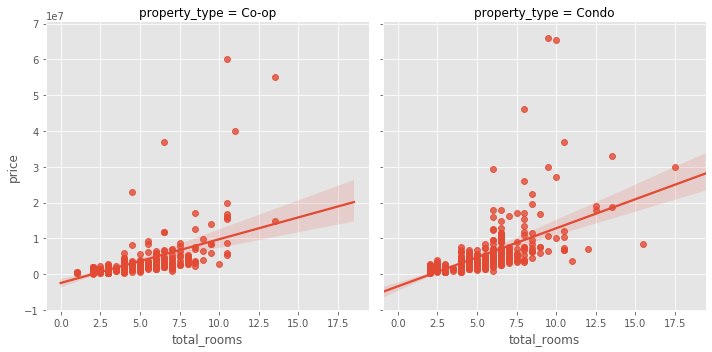

In [58]:
#looking at rooms vs price 
major_props = ['Co-op', 'Condo']
df_filt = df[df['property_type'].isin(major_props)] 

sns.lmplot('total_rooms', 'price', df_filt, col = 'property_type')

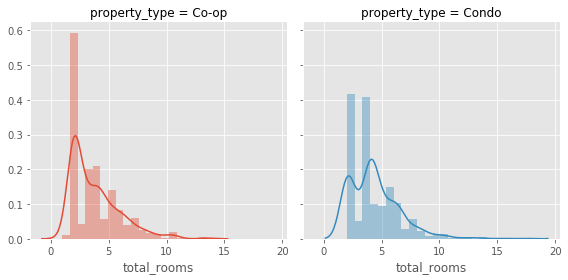

In [59]:
#looking at rooms by property type  

plotgrid = sns.FacetGrid(df_filt, col = "property_type", hue = "property_type", height = 4) 

plotgrid.map(sns.distplot, 'total_rooms')

In [69]:
#looking at sqft vs price 
#cleaning the sqft column
df_sqft = df.dropna(axis = 0, how = 'any') 
sqft = df_sqft['sqft'].str.replace(',','')
df_sqft['sqft'] = [int(x) for x in sqft]

sns.lmplot('sqft', 'price', df_sqft)

C:\Users\bpj25\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,area,baths,beds,have_beds,price,property_type,sqft,year_built,zipcode,high_payment,low_payment,low_monthly,high_monthly,annual_income_high,annual_income_low,total_rooms
0,"Manhattan, NY, 10023",1.0,0.0,Studio,555000,Co-op,570,1964.0,10023,111000.0,27750.0,1465.0,1233.0,49320,58600,1.0
2,"New York, NY, 10022",4.5,3.0,bed,16995000,Condo,4003,2015.0,10022,3399000.0,849750.0,44848.0,37767.0,1510680,1793920,7.5
3,"Manhattan, NY, 10001",1.0,0.0,Studio,325000,Co-op,14000,1929.0,10001,65000.0,16250.0,858.0,722.0,28880,34320,1.0
4,"Manhattan, NY, 10022",2.0,2.0,bed,895000,Co-op,850,1962.0,10022,179000.0,44750.0,2362.0,1989.0,79560,94480,4.0
5,"Manhattan, NY, 10016",1.0,0.0,Studio,350000,Co-op,475,1959.0,10016,70000.0,17500.0,924.0,778.0,31120,36960,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,"New York, NY, 10075",2.0,2.0,bed,1250000,Co-op,1157,1928.0,10075,250000.0,62500.0,3299.0,2778.0,111120,131960,4.0
1654,"New York, NY, 10128",4.5,4.0,bed,6995000,Co-op,3325,1917.0,10128,1399000.0,349750.0,18459.0,15544.0,621760,738360,8.5
1655,"New York, NY, 10128",1.0,1.0,bed,449000,Co-op,520,1910.0,10128,89800.0,22450.0,1185.0,998.0,39920,47400,2.0
1657,"New York, NY, 10128",2.0,2.0,bed,1250000,Condo,1157,1975.0,10128,250000.0,62500.0,3299.0,2778.0,111120,131960,4.0


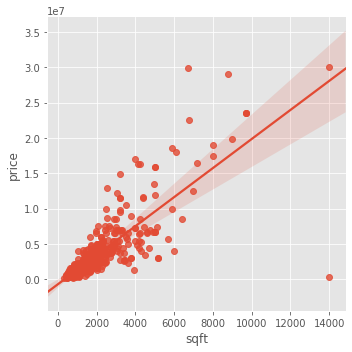

In [70]:
sns.lmplot('sqft', 'price', df_sqft,)

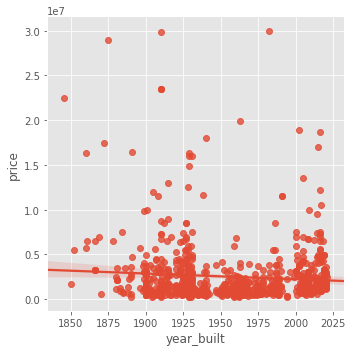

In [71]:
sns.lmplot('year_built', 'price', df_sqft)

In [72]:
#Looking at the correlation between year estate was built and price
df_sqft['year_built']

0       1964.0
2       2015.0
3       1929.0
4       1962.0
5       1959.0
         ...  
1652    1928.0
1654    1917.0
1655    1910.0
1657    1975.0
1661    1941.0
Name: year_built, Length: 895, dtype: float64

In [84]:
group1 = df.groupby('zipcode')
group1.size() 
group1[['price']].median()


,price
zipcode,
10001,2295000.0
10002,870000.0
10003,1372500.0
10004,856500.0
10005,1550000.0
10006,1720000.0
10007,4495000.0
10009,1202500.0
10010,1895000.0
